Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
# we can get the zip file with !wget.
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-08-27 00:14:17--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip’

LoanStats_2019Q1.cs     [              <=>   ]  19.37M  1.71MB/s    in 11s     

2019-08-27 00:14:29 (1.69 MB/s) - ‘LoanStats_2019Q1.csv.zip’ saved [20314386]



In [0]:
# load the zip file.
!ls

LoanStats_2019Q1.csv.zip  sample_data


In [0]:
# now we unzip the zip file.
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [0]:
# look at the headers of the .csv file without loading it into a data frame with !head.
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
# lood at the end headers of the .csv file with !tail.
!tail LoanStats_2019Q1.csv

"","","40000","40000","40000"," 36 months","  6.46%","1225.24","A","A1","President - North America","4 years","MORTGAGE","520000","Verified","Jan-2019","Current","n","","","credit_card","Credit card refinancing","752xx","TX","9.96","0","Sep-2006","1","43","","21","0","59529","29.6%","57","f","33858.42","33858.42","7337.08","7337.08","6141.58","1195.50","0.0","0.0","0.0","Jul-2019","1225.24","Aug-2019","Jul-2019","0","43","1","Individual","","","","0","0","864480","2","3","0","0","28","27151","35","3","5","38479","34","111100","1","0","3","7","41166","41467","34.3","0","0","147","146","2","2","9","3","43","3","43","0","4","5","8","16","10","14","36","5","21","0","0","0","3","98.2","12.5","0","0","1033574","95958","100800","78634","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","5000","5000","5000"," 36 months"," 13.56%","169.83","C","C1","","n/a","MORTGAGE","48000","Not Verified","Jan-2019","Current","n","","","home_improvement"

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
# import pandas as pd to load the data set.
import pandas as pd

# label the dat set, we saw above the header is shown as a row and there are 2 footers as the end of the data set so we are skipping 1 row and 2 footers, use engine python.
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')

# show the shape of the data set.
print(df.shape)

# show the header of the data set.
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19031.49,19031.49,1958.20,1958.20,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225,21225,21225,60 months,14.74%,502.05,C,C2,ceo,10+ years,MORTGAGE,225000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0,Sep-1994,2,NaN,110.0,14,1,95868,87.7%,22,w,20492.06,20492.06,1471.39,1471.39,...,50.0,1,0,747075,209426,53500,128175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,NaN,NaN,MORTGAGE,62000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1,Nov-1987,0,4.0,NaN,8,0,7285,77.5%,18,w,4677.78,4677.78,532.09,532.09,...,50.0,0,0,255738,31615,9400,39938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000,20000,20000,36 months,8.19%,628.49,A,A4,Executive Director of Guardian Advantage,1 year,MORTGAGE,200000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,190xx,PA,22.66,1,Oct-2001,0,18.0,NaN,20,0,20984,32.1%,49,w,18513.93,18513.93,1867.27,1867.27,...,22.2,0,0,448069,84744,49400,105180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000,12000,12000,60 months,15.57%,289.09,C,C3,Computer Operator,5 years,MORTGAGE,49000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,152xx,PA,13.47,0,Apr-1993,0,38.0,NaN,18,0,17672,48.2%,36,w,11594.62,11594.62,846.51,846.51,...,14.3,0,0,189260,106025,24400,68860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# check to see where the NA's are.
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
# we can look as a specific column and see the NA's.
df[df.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [0]:
# look at the info of the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [0]:
# we can set how many columns and row we want to see.
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [0]:
# we can get the transverse data set with .T, this may look better with so many columns in the data set.
df.head().T

,0,1,2,3,4
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,20000,21225,5000,20000,12000
funded_amnt,20000,21225,5000,20000,12000
funded_amnt_inv,20000,21225,5000,20000,12000
term,60 months,60 months,36 months,36 months,60 months
int_rate,17.19%,14.74%,17.97%,8.19%,15.57%
installment,499.1,502.05,180.69,628.49,289.09
grade,C,C,D,A,C
sub_grade,C5,C2,D1,A4,C3


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
# look at the statistics of the data set, typically only includes #s but with (includ='object') it will show all.
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115447,109598,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,6,6,6
unique,2,53,7,33,39387,11,5,3,3,7,2,12,12,877,50,652,1055,2,7,3,8,2,3,577,2,1,1,1,1,1,1,1,2,2,1,2
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jul-2019,Aug-2019,Jul-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,Jul-2019,ACTIVE,Jul-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,107668,115674,63747,63747,1162,15902,1033,1054,101423,90255,84158,110426,98994,6395,150,115674,1,1,1,1,1,1,1,115669,5,6,5


In [0]:
# lets look at the 'emp_length' column values.
df.emp_length.value_counts()

10+ years    34490
< 1 year     15044
2 years       9695
3 years       8719
1 year        7919
5 years       7189
4 years       6777
6 years       4636
7 years       3913
8 years       3625
9 years       2567
Name: emp_length, dtype: int64

### Convert `int_rate`

In [0]:
# load the data set again, same set up.
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')

# show the shape of the data set.
print(df.shape)

# show the headers of the data set.
df.head()

(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19031.49,19031.49,1958.20,1958.20,968.51,989.69,0.0,0.0,0.0,Jul-2019,499.10,Aug-2019,Jul-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225,21225,21225,60 months,14.74%,502.05,C,C2,ceo,10+ years,MORTGAGE,225000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0,Sep-1994,2,NaN,110.0,14,1,95868,87.7%,22,w,20492.06,20492.06,1471.39,1471.39,732.94,738.45,0.0,0.0,0.0,Jul-2019,502.05,Jul-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,NaN,1.0,NaN,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,NaN,NaN,MORTGAGE,62000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1,Nov-1987,0,4.0,NaN,8,0,7285,77.5%,18,w,4677.78,4677.78,532.09,532.09,322.22,209.87,0.0,0.0,0.0,Jul-2019,180.69,Jul-2019,Jul-2019,0,4.0,1,Individual,NaN,NaN,NaN,0,0,206639,0,1,0,0,33.0

In [0]:
x = '12.5%'

In [0]:
# lets remove the % sign in the interest rate colum so it can be used.
df['int rate'] = df['int_rate'].str.strip('%').astype(float)

In [0]:
# show the new data for 'int_rate' column.
df['int rate'].head()

0    17.19
1    14.74
2    17.97
3     8.19
4    15.57
Name: int rate, dtype: float64

Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

In [0]:
x

'12.5%'

In [0]:
# create a function to remove the '%' sign.
def remove_percent_sign(string):
  '''This function takes a string as input, strips the trailing percent sign, and returns float interest rate.'''
  return float(string.strip('%'))

remove_percent_sign(x)

12.5

In [0]:
# we can now apply the 'remove_percent_sign' function to the whole 'int_rate' column.
df['int_rate'] = df['int_rate'].apply(remove_percent_sign)
df['int_rate'].head()

0    17.19
1    14.74
2    17.97
3     8.19
4    15.57
Name: int_rate, dtype: float64

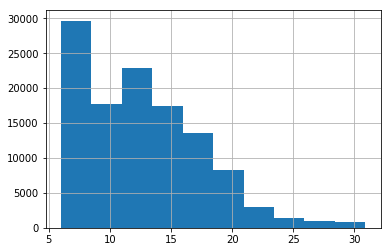

In [0]:
# now that the '%' sign is removed we can show the 'int_rate' column in a histogram plot.
df.int_rate.hist();

### Clean `emp_title`

Look at top 20 titles

In [0]:

df.emp_title.nunique()

39387

How often is `emp_title` null?

In [0]:
# see how many NA's are in the emp_title column.
df.emp_title.isna().sum()

19518

In [0]:

df.shape

(115675, 145)

Clean the title and handle missing values
- Capitalize
- Strip spaces
- Replace 'NaN' with missing

In [0]:
import numpy as np

isinstance(np.nan,str)

False

In [0]:
import numpy as np

example = ['owner', 'Supervisor ', ' Project manager', np.nan]

def clean_emp_title(x):
  if isinstance(x, str):
      return x.strip().title()
  else:
      return 'Missing'
  
#for ex in example:
#  print(clean_emp_title(ex))
  
[clean_emp_title(x) for x in example]

['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)
df['emp_title'].head(20)

0                        Front Desk Supervisor
1                                          Ceo
2                                      Missing
3     Executive Director Of Guardian Advantage
4                            Computer Operator
5                             Security Officer
6                   Vice President, Trade Show
7                                      Missing
8     Administrative Assistant/Legal Secretary
9                                     Engineer
10                               Social Worker
11                                  Qc Manager
12                              Office Manager
13                          Executive Director
14                         Executive Assistant
15                                 Case Packer
16                     Chief Executive Officer
17                               Station Agent
18                         Electrical Engineer
19                                       Fresh
Name: emp_title, dtype: object

In [0]:
df.emp_title.nunique()

31429

In [0]:
df.emp_title.value_counts().head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'].str.contains('manager', case=False).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: emp_title, dtype: bool

In [0]:
df['emp_title'].iloc[0:10]

0                       Front Desk Supervisor
1                                         Ceo
2                                     Missing
3    Executive Director Of Guardian Advantage
4                           Computer Operator
5                            Security Officer
6                  Vice President, Trade Show
7                                     Missing
8    Administrative Assistant/Legal Secretary
9                                    Engineer
Name: emp_title, dtype: object

In [0]:
df['emp_title_manager'] = df.emp_title.str.contains('Manager')
df['emp_title_manager'].value_counts()

False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [0]:
df.groupby('emp_title_manager').int_rate.mean()

emp_title_manager
False    12.744044
True     12.570085
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d'].describe()

count       115675
unique           3
top       Jan-2019
freq         43584
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [0]:
df['issue_month'].value_counts()

1    43584
3    36106
2    35985
Name: issue_month, dtype: int64

In [0]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int rate,emp_title_manager,issue_month
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front Desk Supervisor,6 years,RENT,47000.0,Source Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19031.49,19031.49,1958.20,1958.20,968.51,989.69,0.0,0.0,0.0,Jul-2019,499.10,Aug-2019,Jul-2019,0,50.0,1,Individual,NaN,NaN,NaN,0,0,31546,3,2,1,2,10.0,20859,97.0,4,9,5909,42.0,54300,6,1,3,11,2103.0,23647.0,30.0,0,0,150.0,100,1,1,0,5.0,NaN,3.0,50.0,3,3,4,8,19,19,13,33,4,15,0.0,0,0,5,98.0,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.19,False,3
1,NaN,NaN,21225,21225,21225,60 months,14.74,502.05,C,C2,Ceo,10+ years,MORTGAGE,225000.0,Not Verified,2019-03-01,Current,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0,Sep-1994,2,NaN,110.0,14,1,95868,87.7%,22,w,20492.06,20492.06,1471.39,1471.39,732.94,738.45,0.0,0.0,0.0,Jul-2019,502.05,Jul-2019,Jul-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,694793,1,5,2,4,3.0,113558,76.0,0,1,17353,84.0,109300,1,0,4,5,49628.0,12635.0,76.4,0,0,126.0,294,24,3,4,30.0,NaN,1.0,NaN,0,4,6,4,4,11,7,7,6,14,0.0,0,0,2,100.0,50.0,1,0,747075,209426,53500,128175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.74,False,3
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Missing,NaN,MORTGAGE,62000.0,Not Verified,2019-03-01,Current,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1,Nov-1987,0,4.0,NaN,8,0,7285,77.5%,18,w,4677.78,4677.78,532.09,532.09,322.22,209.87,0.0,0.0,0.0,Jul-2019,180.6

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earlist_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['days_since_earlist_cr_line'].describe()

count    115675.000000
mean       5972.244634
std        2904.216417
min        1124.000000
25%        4141.000000
50%        5358.000000
75%        7367.000000
max       27453.000000
Name: days_since_earlist_cr_line, dtype: float64

In [0]:
27453/365

75.21369863013699

In [0]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [0]:
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,115675,115675,115447,109598,115673
unique,3,652,7,3,8
top,2019-01-01 00:00:00,2006-08-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-07-01 00:00:00
freq,43584,1033,90255,84158,110426
first,2019-01-01 00:00:00,1944-01-01 00:00:00,2019-01-01 00:00:00,2019-07-01 00:00:00,2018-12-01 00:00:00
last,2019-03-01 00:00:00,2016-02-01 00:00:00,2019-07-01 00:00:00,2019-09-01 00:00:00,2019-07-01 00:00:00
